# Graph Switching #

#### Import Dependencies ####

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import copy as copy
import numpy as np

#### This function will perform Seidel switching on a graph for a given vertex. ####

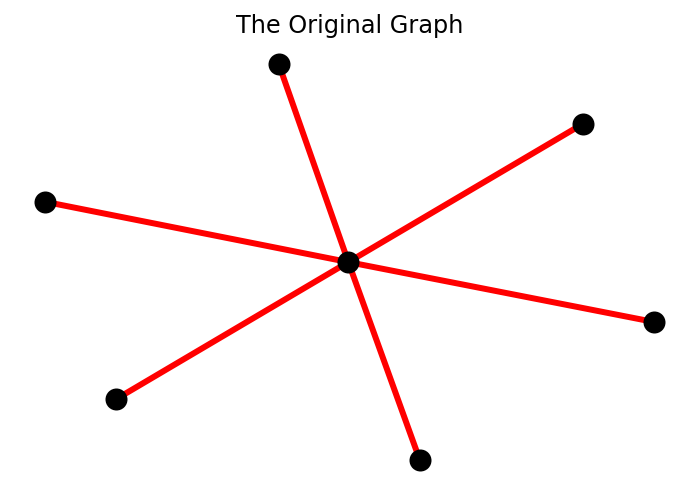

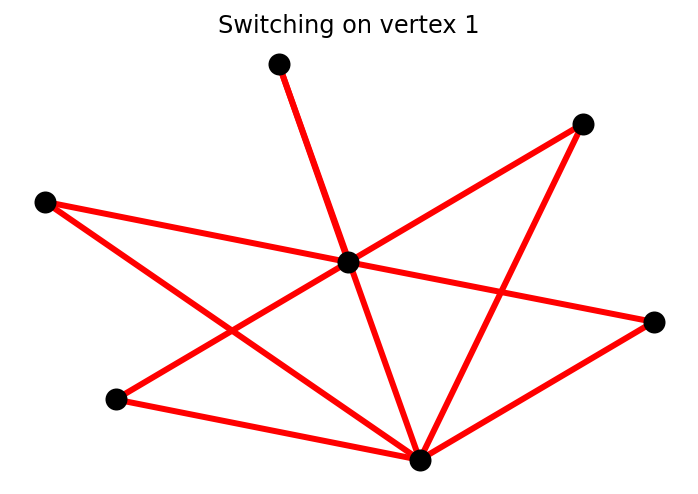

In [3]:
#Creating a graph switching function
def switch(G,v):
    ''' This function will take a graph G and one of it's vertices v, and will output the switching on this vertex '''
    
    nonneighbors = nx.non_neighbors(G, v)
    
    H = copy.deepcopy(G)
    #This will remove all the edges currently incident to v
    H.remove_node(v)
    H.add_node(v)
    
    #This adds the possible edges that were initially not incident to v
    for n in nonneighbors:
        H.add_edge(v,n)
        
    return(H)


#We can create the original graph
G = nx.star_graph(6)
pos = nx.spring_layout(G)
plt.figure()
ax = plt.gca()
ax.set_title('The Original Graph')
nx.draw(G,pos,node_size=100,node_color='black',edge_color='red',width=3)

#This is the swiched graph for comparison
G = switch(G,1)
plt.figure()
ax = plt.gca()
ax.set_title('Switching on vertex ' + str(1))
nx.draw(G,pos,node_size=100,node_color='black',edge_color='red',width=3)

#### This function will create the switching deck for a given graph. There is the option to plot the switching decks as well, if desired.

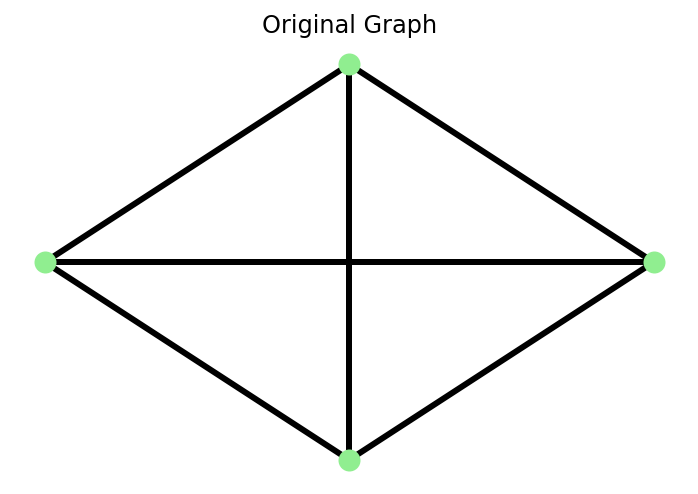

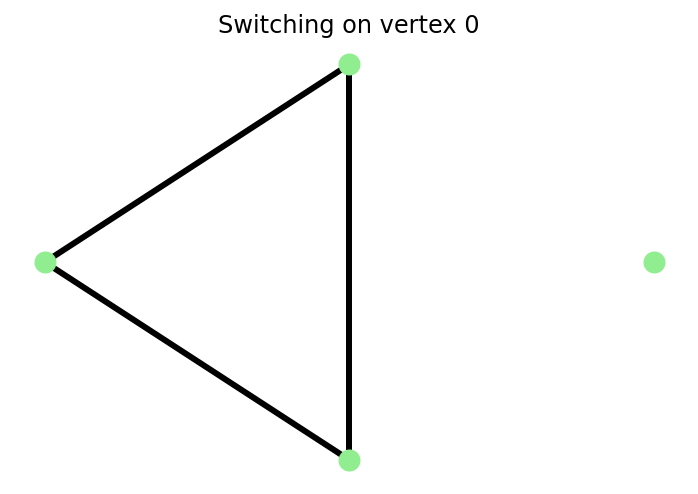

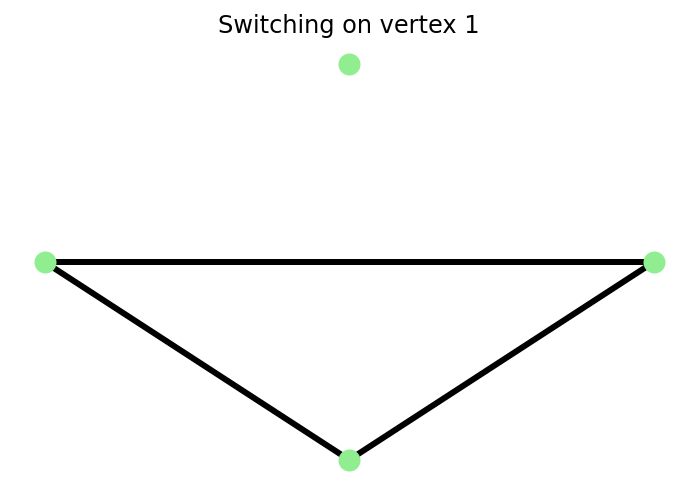

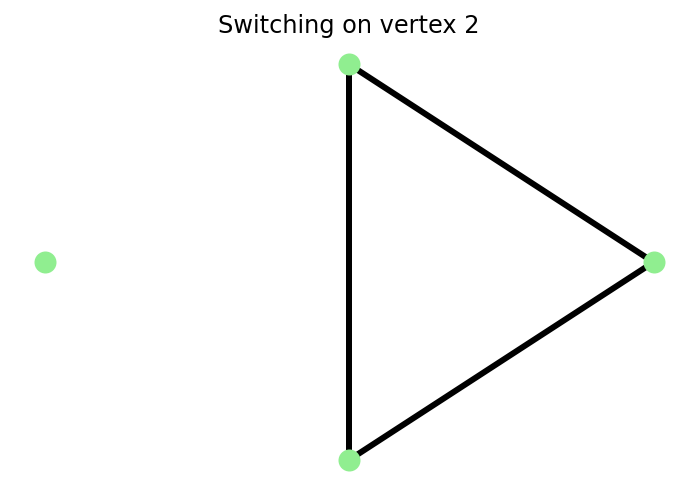

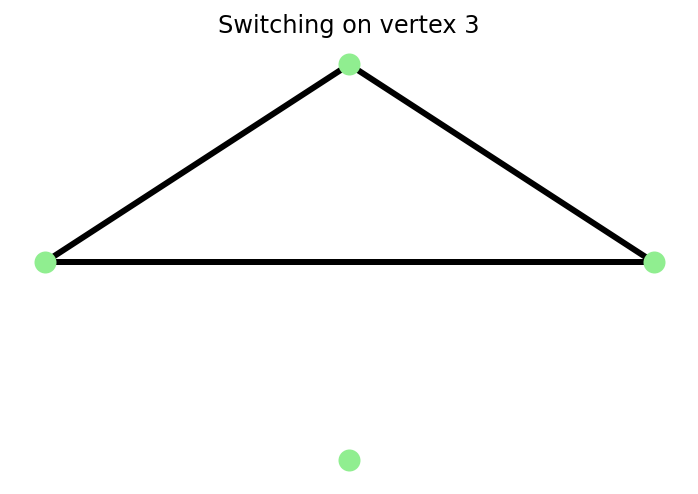

In [4]:
#Creating the switching deck of any graph

def switching_deck(G, draw_original = False, draw_switch = False, titles = False, labels = False, edge_color = 'black',node_color = 'lightgreen', layout = nx.spring_layout):
    '''This function will take in a networkx graph G and return it's switching deck. If you want to see the drawings of these graphs, there are the optional inputs draw_original and draw_switch which will let the function output drawings of either the orignal graph or the switchings. The other optional arguments are for formatting the graph drawings. '''
    
    #This defines the deck and the layout we will use
    deck = []
    pos = layout(G)
    
    #This draws the original graph
    if draw_original:
        plt.figure()
        ax = plt.gca()
        if titles:
            ax.set_title('Original Graph')
        nx.draw(G,pos,node_size=100,node_color=node_color,edge_color=edge_color,with_labels = labels, width=3, ax=ax,)
        
    for v in list(G):
        #This performs the switching and adds a given graph to the deck
        x = switch(G,v)
        deck.append(x)
        
        #This draws the switching graphs
        if draw_switch:
            plt.figure()
            ax = plt.gca()
            if titles:
                ax.set_title('Switching on vertex ' + str(v))
            nx.draw(x,pos,node_size=100,node_color=node_color,edge_color=edge_color,with_labels = labels, width=3, ax=ax)
            
    return(deck)

G = nx.complete_graph(4)
deck = switching_deck(G, draw_original = True, draw_switch = True,titles = True, layout = nx.kamada_kawai_layout)

#### Here are all of the graphs on four vertices up to isomorphism.

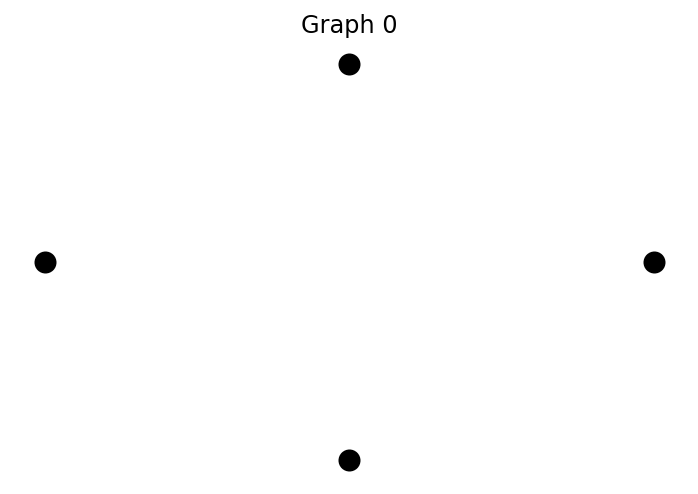

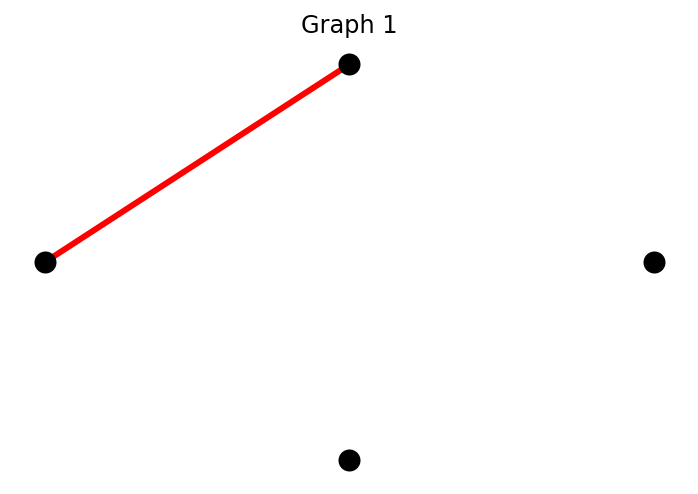

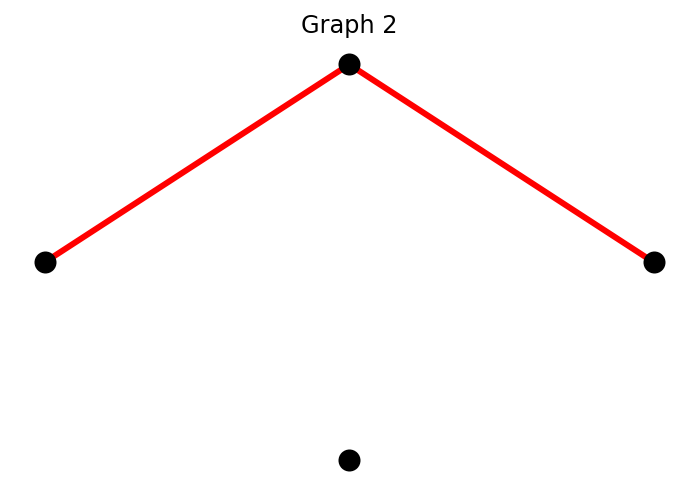

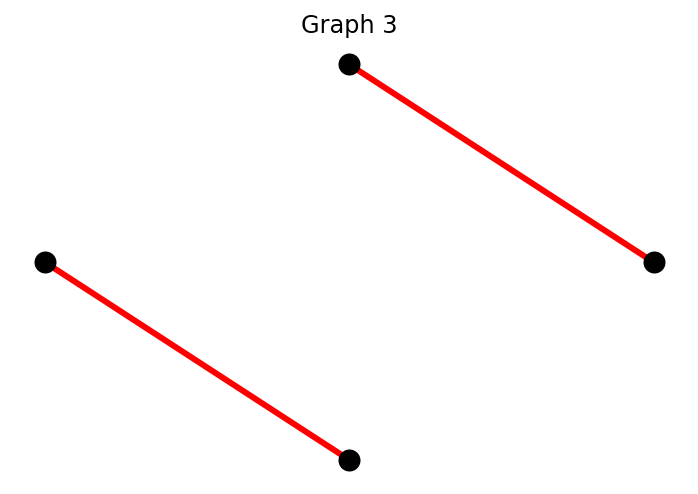

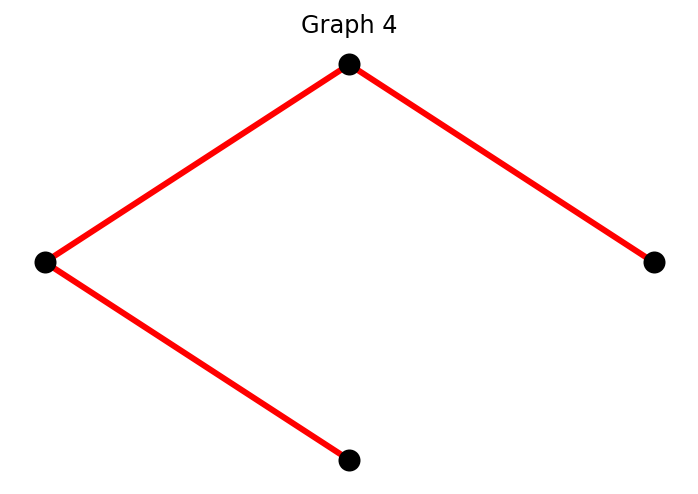

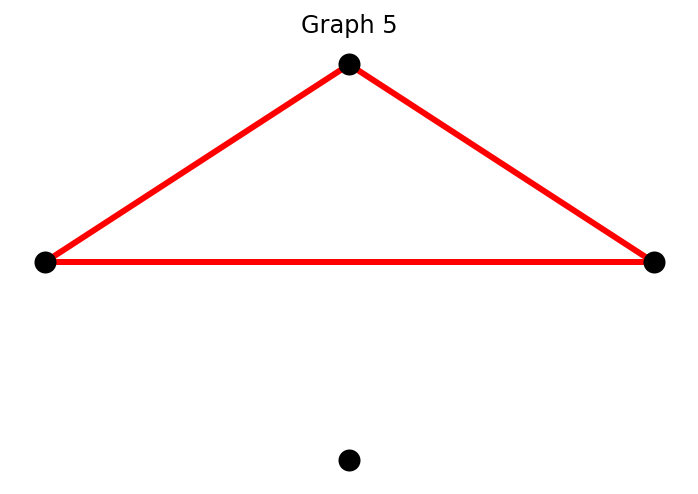

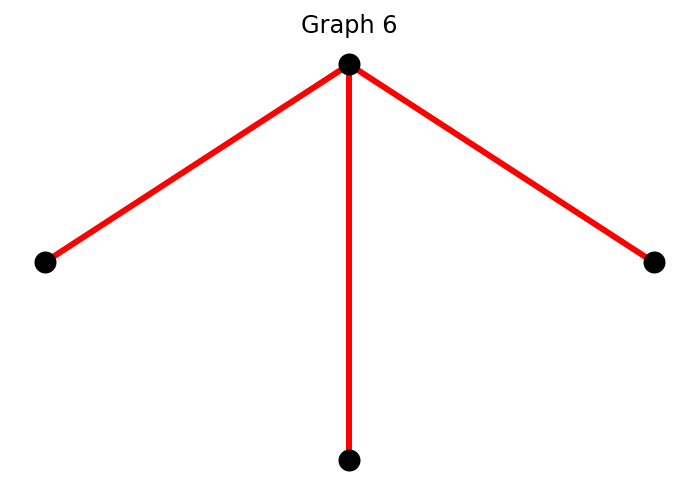

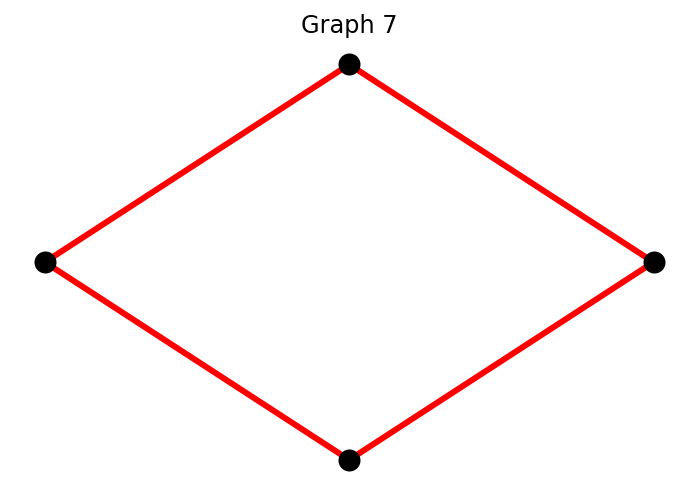

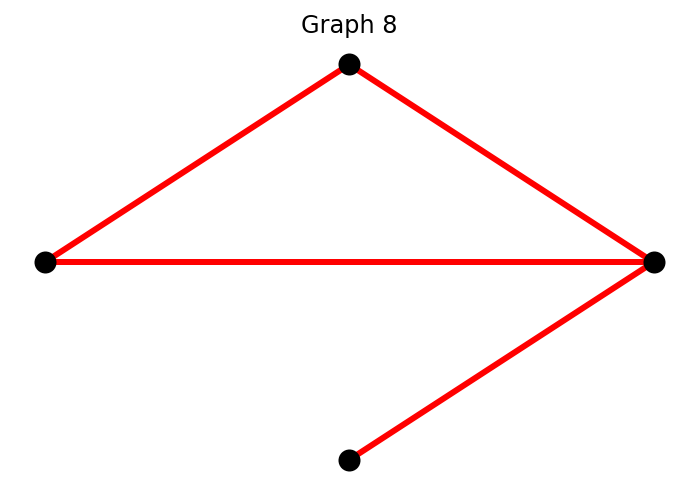

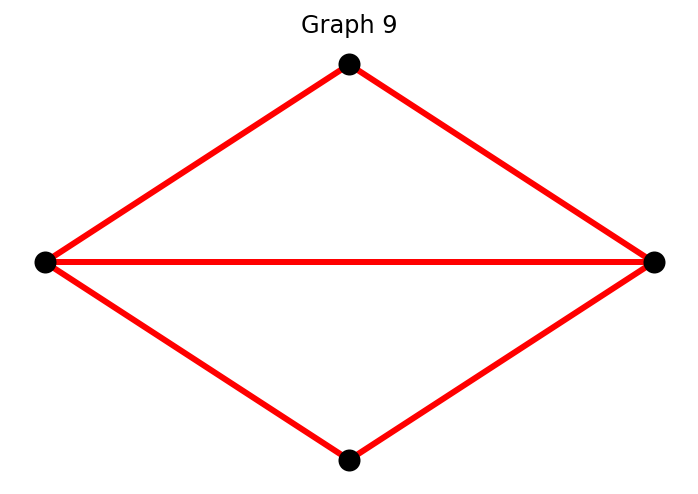

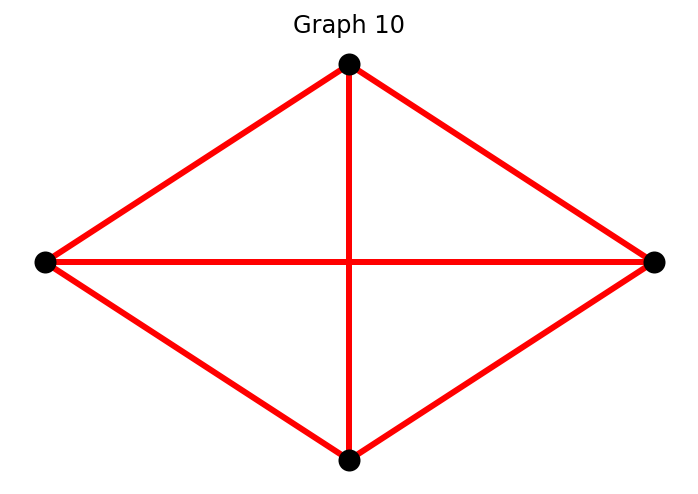

In [5]:
Graphs = []

#Empty Graph
G1 = nx.empty_graph(n=4)
Graphs.append(G1)

#P1
G2 = nx.empty_graph(n=4)
G2.add_edge(1,2)
Graphs.append(G2)

#P2
G3 = nx.empty_graph(n=4)
G3.add_edges_from([(0,1),(1,2)])
Graphs.append(G3)

#P2 + P2
G4 = nx.empty_graph(n=4)
G4.add_edges_from([(0,1),(2,3)])
Graphs.append(G4)

#P3
G5 = nx.path_graph(n=4)
Graphs.append(G5)

#C3
G6 = nx.cycle_graph(n=3)
G6.add_node(3)
Graphs.append(G6)

#Claw
G7 = nx.empty_graph(n=4)
G7.add_edges_from([(0,1),(1,2),(1,3)])
Graphs.append(G7)

#C4
G8 = nx.cycle_graph(n=4)
Graphs.append(G8)

#Paw
G9 = nx.cycle_graph(n=3)
G9.add_node(3)
G9.add_edge(0,3)
Graphs.append(G9)

#Diamond
G10 = nx.cycle_graph(n=4)
G10.add_edge(0,2)
Graphs.append(G10)

#K4
G11 = nx.complete_graph(n=4)
Graphs.append(G11)

for i in range(len(Graphs)):
    pos = nx.circular_layout(Graphs[i])
    plt.figure()
    ax = plt.gca()
    ax.set_title('Graph ' + str(i))
    nx.draw(Graphs[i],pos,node_size=100,node_color='black',edge_color='red',width=3)

#### Now, I will store each deck in as a list.

In [6]:
def generateDecks(Graphs, counts = False):
    '''This function will take in a list of Graphs and will return their respective decks in a list. If you turn on counts, this will return a list of indices of elements of Graphs, each representing a switching.'''
    Decks = []
    for i in range(len(Graphs)):
        Decks.append(switching_deck(Graphs[i]))
        
    if counts:
        countDecks = []
        for deck in Decks:
            countDeck = []
            for i in range(len(Graphs)):
                for graph in deck:
                    if nx.is_isomorphic(graph, Graphs[i]):
                        countDeck.append(i)
            countDecks.append(countDeck)
        return(countDecks)
    
    return Decks

Decks = generateDecks(Graphs, counts = True)
print(Decks)

[[6, 6, 6, 6], [2, 2, 8, 8], [1, 4, 4, 9], [5, 5, 5, 5], [2, 2, 8, 8], [3, 3, 3, 10], [0, 7, 7, 7], [6, 6, 6, 6], [1, 4, 4, 9], [2, 2, 8, 8], [5, 5, 5, 5]]
